In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')

In [205]:
patrol = pd.read_csv("../data/cleaned_patrols.csv", parse_dates=[["StartDate", "StartTime"], ["EndDate", "EndTime"]])
convo = pd.read_csv("../data/sorted_new.csv")

<AxesSubplot:xlabel='StartDate_StartTime'>

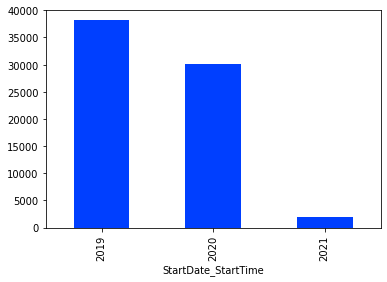

In [206]:
patrol.groupby(patrol["StartDate_StartTime"].dt.year)["Duration"].sum().plot.bar()

<AxesSubplot:xlabel='CalendarName'>

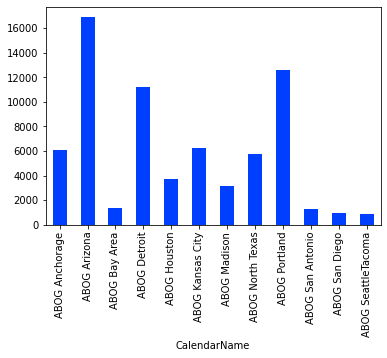

In [207]:
patrol.groupby('CalendarName')['Duration'].sum().plot.bar()

In [208]:
display(patrol.dtypes)
type(patrol.iloc[:, 0][0])


StartDate_StartTime    datetime64[ns]
EndDate_EndTime        datetime64[ns]
index                           int64
CalendarName                   object
EventTitle                     object
Duration                        int64
dtype: object

pandas._libs.tslibs.timestamps.Timestamp

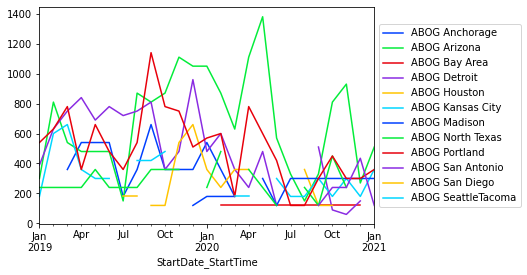

In [209]:
patrol.groupby([pd.Grouper(key='StartDate_StartTime', freq='M'), 'CalendarName']).Duration.sum().unstack().plot.line().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

uture version. Import from datetime module instead.
  patrol_20 = patrol[(patrol["StartDate_StartTime"] >= (pd.datetime.strptime("2020", '%Y'))) & (patrol["StartDate_StartTime"]< (pd.datetime.strptime("2021", '%Y')))]
<ipython-input-210-fea026527aa0>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  patrol_21 = patrol[patrol["StartDate_StartTime"] >= (pd.datetime.strptime("2021", '%Y'))]
<ipython-input-210-fea026527aa0>:48: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if initiated < (pd.datetime.strptime("2020", '%Y')):
<ipython-input-210-fea026527aa0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co

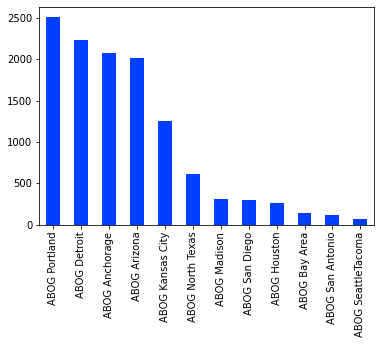

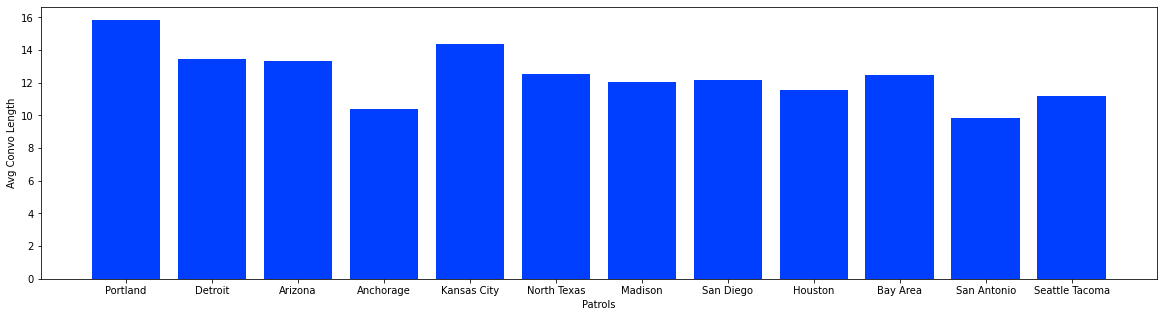

In [210]:
convo_joined = convo[convo["Event"] == "Joined"]
convo_joined['Initiated'] = convo_joined['Initiated'].apply(lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
convo["Patrol"] = None
convo_joined["Patrol"] = ""

patrol_19 = patrol[patrol["StartDate_StartTime"] < (pd.datetime.strptime("2020", '%Y'))]
patrol_20 = patrol[(patrol["StartDate_StartTime"] >= (pd.datetime.strptime("2020", '%Y'))) & (patrol["StartDate_StartTime"]< (pd.datetime.strptime("2021", '%Y')))]
patrol_21 = patrol[patrol["StartDate_StartTime"] >= (pd.datetime.strptime("2021", '%Y'))]

multiple = []
outlier = []

def assign(case, id):
    convo["Patrol"][convo["ConversationId"] == id] = case
    convo_joined["Patrol"][convo_joined["ConversationId"] == id] = case

def identify(year, initiated, id, assigned, min, outlier_patrol, multiple, outlier):
    for j in range(len(year)):
        start = year["StartDate_StartTime"].iloc[j]
        end = year["EndDate_EndTime"].iloc[j]
        name = year["CalendarName"].iloc[j]
        if initiated >= start and initiated <= end:
            if assigned:
                if id not in multiple:
                    multiple += [id]
            else:
                assigned = True
                assign(name, id)
        start_diff = abs(start - initiated)
        end_diff = abs(end - initiated)
        if  start_diff < min:
            min = start_diff
            outlier_patrol = name
        if  end_diff < min:
            min = end_diff
            outlier_patrol = name
    if not assigned:
        outlier += [id]
        assign(outlier_patrol, id)


for i in range(len(convo_joined)):
    initiated = convo_joined["Initiated"].iloc[i]
    id = convo_joined["ConversationId"].iloc[i]
    assigned = False
    min = pd.Timedelta(days=365)
    outlier_patrol = ""
    if initiated < (pd.datetime.strptime("2020", '%Y')):
        identify(patrol_19, initiated, id, assigned, min, outlier_patrol, multiple, outlier)
    elif initiated < (pd.datetime.strptime("2021", '%Y')):
        identify(patrol_20, initiated, id, assigned, min, outlier_patrol, multiple, outlier)
    else:
        identify(patrol_21, initiated, id, assigned, min, outlier_patrol, multiple, outlier)
        
convo_joined["Patrol"].value_counts().plot.bar()

convo_portland = convo[convo["Patrol"] == "ABOG Portland"]
convo_detroit = convo[convo["Patrol"] == "ABOG Detroit"]
convo_arizona = convo[convo["Patrol"] == "ABOG Arizona"]
convo_anchorage = convo[convo["Patrol"] == "ABOG Anchorage"]
convo_kansas_city = convo[convo["Patrol"] == "ABOG Kansas City"]
convo_north_texas = convo[convo["Patrol"] == "ABOG North Texas"]
convo_madison = convo[convo["Patrol"] == "ABOG Madison"]
convo_san_diego = convo[convo["Patrol"] == "ABOG San Diego"]
convo_houston = convo[convo["Patrol"] == "ABOG Houston"]
convo_bay_area = convo[convo["Patrol"] == "ABOG Bay Area"]
convo_san_antonio = convo[convo["Patrol"] == "ABOG San Antonio"]
convo_seattle_tacoma = convo[convo["Patrol"] == "ABOG SeattleTacoma"]

convo_patrol_avgs = []
x = ["Portland", "Detroit", "Arizona", "Anchorage", "Kansas City", "North Texas", "Madison", "San Diego", "Houston", "Bay Area", "San Antonio", "Seattle Tacoma"]

convo_patrol_avgs += [np.mean(convo_portland.groupby("ConversationId").ConversationId.value_counts().tolist())]
convo_patrol_avgs += [np.mean(convo_detroit.groupby("ConversationId").ConversationId.value_counts().tolist())]
convo_patrol_avgs += [np.mean(convo_arizona.groupby("ConversationId").ConversationId.value_counts().tolist())]
convo_patrol_avgs += [np.mean(convo_anchorage.groupby("ConversationId").ConversationId.value_counts().tolist())]
convo_patrol_avgs += [np.mean(convo_kansas_city.groupby("ConversationId").ConversationId.value_counts().tolist())]
convo_patrol_avgs += [np.mean(convo_north_texas.groupby("ConversationId").ConversationId.value_counts().tolist())]
convo_patrol_avgs += [np.mean(convo_madison.groupby("ConversationId").ConversationId.value_counts().tolist())]
convo_patrol_avgs += [np.mean(convo_san_diego.groupby("ConversationId").ConversationId.value_counts().tolist())]
convo_patrol_avgs += [np.mean(convo_houston.groupby("ConversationId").ConversationId.value_counts().tolist())]
convo_patrol_avgs += [np.mean(convo_bay_area.groupby("ConversationId").ConversationId.value_counts().tolist())]
convo_patrol_avgs += [np.mean(convo_san_antonio.groupby("ConversationId").ConversationId.value_counts().tolist())]
convo_patrol_avgs += [np.mean(convo_seattle_tacoma.groupby("ConversationId").ConversationId.value_counts().tolist())]

plt.figure(figsize=(20, 5))
plt.bar(x, convo_patrol_avgs, width=0.8)
plt.xlabel("Patrols")
plt.ylabel("Avg Convo Length")
plt.show()